In [ ]:
# Install dependencies: pip3 install -r requirements.txt
# !pip install pycaret 
# !pip install kaggle shap

In [4]:
# Import libraries
import pandas as pd
import kaggle
from pycaret.classification import *

In [2]:
data = "../data/"

In [5]:
# download Bank Customer Churn Prediction dataset from kaggle
kaggle.api.authenticate()
kaggle.api.dataset_download_files('adammaus/predicting-churn-for-bank-customers', path=data, unzip=True)

In [6]:
# read the data
df = pd.read_csv(data + 'Churn_Modelling.csv')

In [7]:
# view the first 3 rows
df.head(3)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1


In [8]:
# check for duplicated rows
df.duplicated().sum()

0

In [9]:
# get the data types
df.dtypes

RowNumber            int64
CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [10]:
# list the columns
df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [11]:
# identifiy the categorical features
cat_features = ['Geography', 'Gender']

In [12]:
# get the spread of the target variable
df['Exited'].value_counts(normalize=True)

0    0.7963
1    0.2037
Name: Exited, dtype: float64

In [13]:
experiment = setup(data=df, target='Exited', categorical_features=cat_features,
                     numeric_features=['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts',
                                         'HasCrCard', 'IsActiveMember', 'EstimatedSalary'],
                     ignore_features=['RowNumber', 'CustomerId', 'Surname'],
                     session_id=40)

,Description,Value
0,Session id,40
1,Target,Exited
2,Target type,Binary
3,Original data shape,"(10000, 14)"
4,Transformed data shape,"(10000, 13)"
5,Transformed train set shape,"(7000, 13)"
6,Transformed test set shape,"(3000, 13)"
7,Ignore features,3
8,Ordinal features,1
9,Numeric features,8


In [14]:
# compare baseline models
best = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
gbc,Gradient Boosting Classifier,0.8674,0.8666,0.4916,0.7761,0.6010,0.5264,0.5467,0.5810
rf,Random Forest Classifier,0.8647,0.8535,0.4783,0.7711,0.5895,0.5140,0.5354,0.4250
lightgbm,Light Gradient Boosting Machine,0.8634,0.8611,0.5176,0.7333,0.6059,0.5265,0.5386,0.2710
et,Extra Trees Classifier,0.8579,0.8437,0.4460,0.7591,0.5607,0.4828,0.5077,0.3630
xgboost,Extreme Gradient Boosting,0.8567,0.8488,0.5015,0.7119,0.5874,0.5039,0.5158,0.3860
ada,Ada Boost Classifier,0.8536,0.8493,0.4685,0.7162,0.5654,0.4821,0.4983,0.1720
ridge,Ridge Classifier,0.8074,0.0000,0.1332,0.6348,0.2196,0.1600,0.2251,0.0530
lda,Linear Discriminant Analysis,0.8074,0.7685,0.2377,0.5660,0.3337,0.2429,0.2746,0.0550
dt,Decision Tree Classifier,0.7967,0.6957,0.5252,0.5009,0.5124,0.3842,0.3846,0.0510
dummy,Dummy Classifier,0.7963,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0470


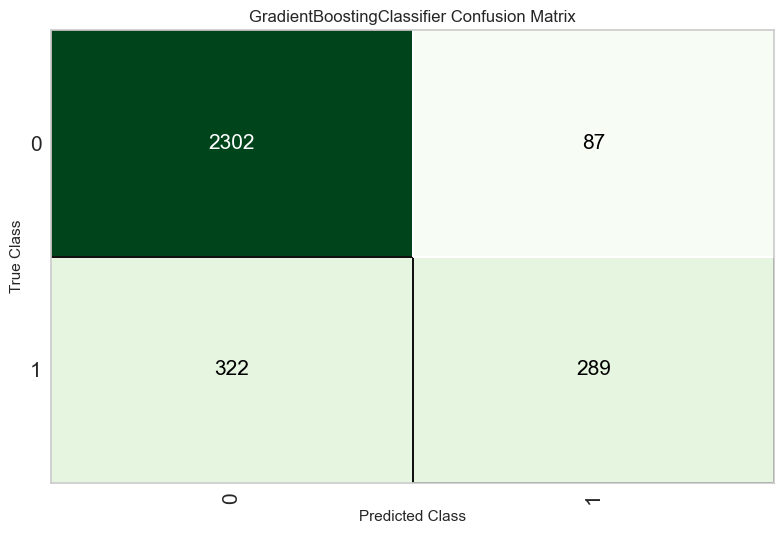

In [15]:
# plot confusion matrix
plot_model(best, plot = 'confusion_matrix')

In [16]:
# get available config
get_config()

{'USI',
 'X',
 'X_test',
 'X_test_transformed',
 'X_train',
 'X_train_transformed',
 'X_transformed',
 '_available_plots',
 '_ml_usecase',
 'data',
 'dataset',
 'dataset_transformed',
 'exp_id',
 'exp_name_log',
 'fix_imbalance',
 'fold_generator',
 'fold_groups_param',
 'fold_shuffle_param',
 'gpu_n_jobs_param',
 'gpu_param',
 'html_param',
 'idx',
 'is_multiclass',
 'log_plots_param',
 'logging_param',
 'memory',
 'n_jobs_param',
 'pipeline',
 'seed',
 'target_param',
 'test',
 'test_transformed',
 'train',
 'train_transformed',
 'variable_and_property_keys',
 'variables',
 'y',
 'y_test',
 'y_test_transformed',
 'y_train',
 'y_train_transformed',
 'y_transformed'}

In [17]:
get_config('X_train_transformed')

,CreditScore,Geography_Spain,Geography_France,Geography_Germany,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
7673,750.0,1.0,0.0,0.0,0.0,37.0,2.0,113817.062500,1.0,0.0,0.0,88333.742188
4229,592.0,0.0,1.0,0.0,0.0,34.0,9.0,0.000000,2.0,1.0,1.0,20460.199219
641,706.0,0.0,1.0,0.0,0.0,29.0,5.0,112564.617188,1.0,1.0,0.0,42334.378906
8531,723.0,1.0,0.0,0.0,1.0,30.0,1.0,0.000000,3.0,1.0,0.0,164647.718750
74,519.0,0.0,1.0,0.0,1.0,36.0,9.0,0.000000,2.0,0.0,1.0,145562.406250
...,...,...,...,...,...,...,...,...,...,...,...,...
2184,652.0,0.0,1.0,0.0,0.0,40.0,1.0,0.000000,2.0,1.0,0.0,126554.960938
3966,815.0,0.0,1.0,0.0,1.0,35.0,4.0,0.000000,2.0,0.0,1.0,198490.328125
9608,700.0,1.0,0.0,0.0,1.0,44.0,9.0,0.000000,2.0,1.0,0.0,142287.656250
7540,553.0,0.0,1.0,0.0,1.0,37.0,1.0,0.000000,1.0,1.0,0.0,30461.550781


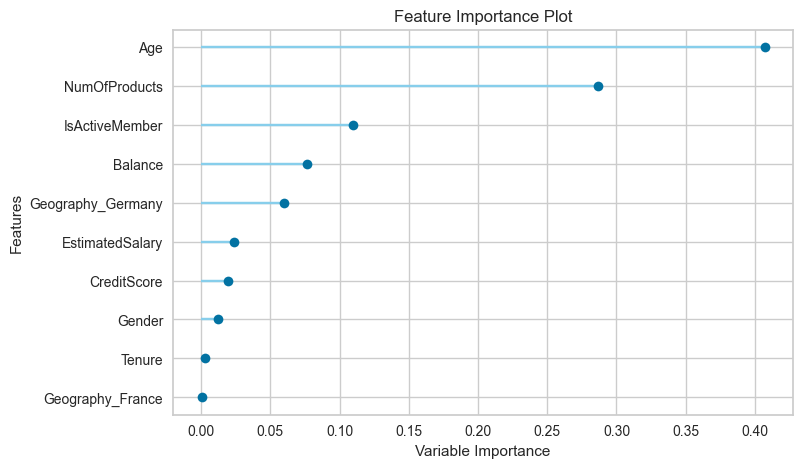

In [18]:
# plot feature importance
plot_model(best, plot = 'feature')

In [19]:
evaluate_model(best)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [20]:
automl()

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='log_loss', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_samples_leaf=1,
                           min_samples_split=2, min_weight_fraction_leaf=0.0,
                           n_estimators=100, n_iter_no_change=None,
                           random_state=40, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [21]:
predict_model(best)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Gradient Boosting Classifier,0.8637,0.8614,0.4730,0.7686,0.5856,0.5095,0.5310


,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,prediction_label,prediction_score
2858,607,France,Male,25,3,0.000000,2,0,0,187048.718750,0,0,0.9762
4492,590,France,Female,32,0,127763.242188,1,1,0,100717.539062,0,0,0.8826
4891,765,Germany,Male,34,5,86055.171875,2,1,1,104220.500000,0,0,0.9682
5375,686,Spain,Male,38,7,111484.882812,1,1,1,76076.203125,0,0,0.9388
1127,549,Germany,Female,45,3,143734.015625,2,1,1,96404.382812,0,0,0.6887
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7279,486,Germany,Male,37,1,101438.000000,1,0,0,51364.558594,0,0,0.6909
8566,679,France,Female,39,4,0.000000,1,0,0,172939.296875,1,0,0.7143
7942,542,France,Female,42,1,0.000000,1,1,1,178256.578125,1,0,0.6264
6754,627,Spain,Female,28,3,157597.609375,1,0,1,34097.218750,0,0,0.9342


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Gradient Boosting Classifier,0.8637,0.8614,0.4730,0.7686,0.5856,0.5095,0.5310


,Samples,Accuracy,AUC,Recall,Precision,F1,Kappa,MCC,Selection Rate
Gender,,,,,,,,,
Female,1381,0.828385,0.716859,0.487324,0.758772,0.593482,0.491177,0.51052,0.165098
Male,1619,0.893762,0.714824,0.453125,0.783784,0.574257,0.518471,0.54393,0.091414


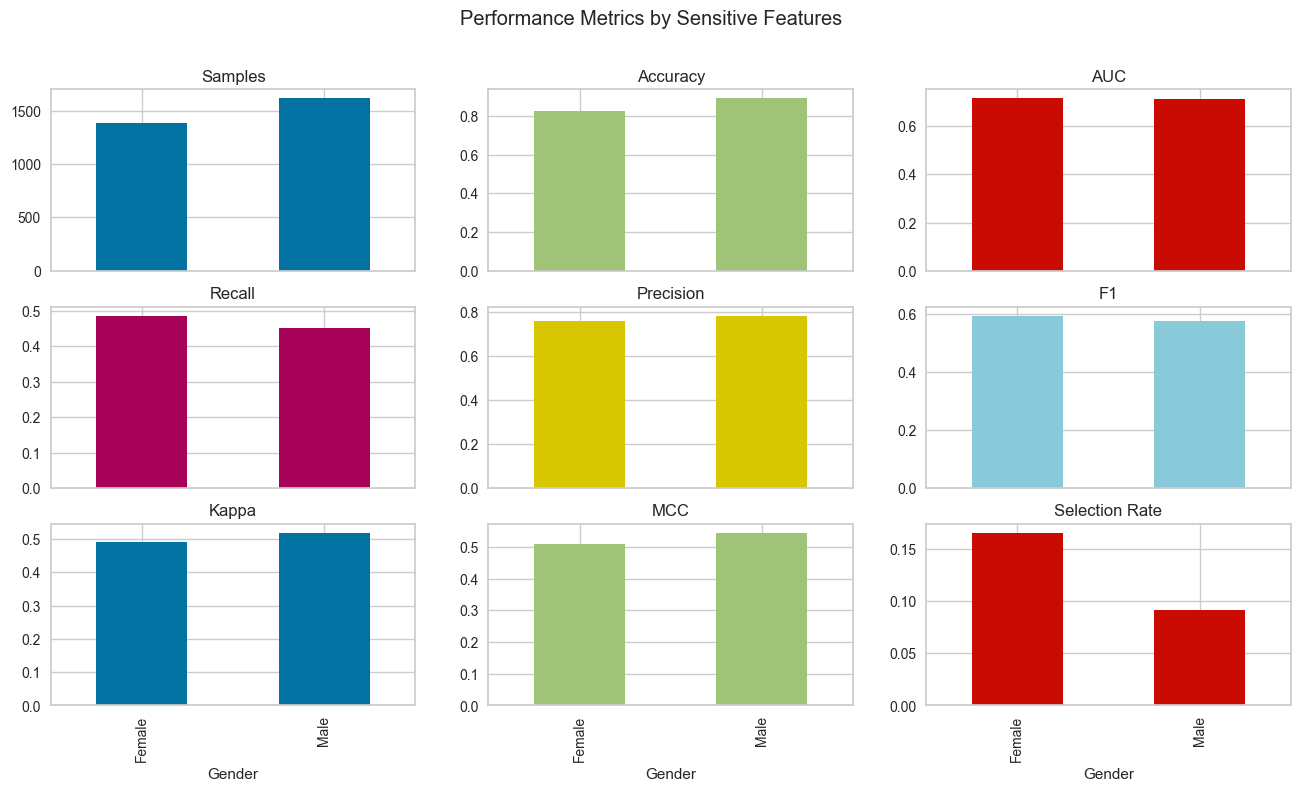

In [24]:
# check fairness
check_fairness(best, sensitive_features = ['Gender'])

In [28]:
# dashboard function
dashboard(best, display_format='inline')

Note: model_output=='probability'. For GradientBoostingClassifier shap values normally get calculated against X_background, but paramater X_background=None, so using X instead
Generating self.shap_explainer = shap.TreeExplainer(model, X, model_output='probability', feature_perturbation='interventional')...
Note: Shap interaction values will not be available. If shap values in probability space are not necessary you can pass model_output='logodds' to get shap values in logodds without the need for a background dataset and also working shap interaction values...
Building ExplainerDashboard..
For this type of model and model_output interactions don't work, so setting shap_interaction=False...
The explainer object has no decision_trees property. so setting decision_trees=False...
Generating layout...
Calculating shap values...
Calculating prediction probabilities...
Calculating metrics...
Calculating confusion matrices...
Calculating classification_dfs...
Calculating roc auc curves...
Calc

In [34]:
# save model
save_model(best, 'my_first_bank_churn_model')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['CreditScore', 'Age', 'Tenure',
                                              'Balance', 'NumOfProducts',
                                              'HasCrCard', 'IsActiveMember',
                                              'EstimatedSalary'],
                                     transformer=SimpleImputer(add_indicator=False,
                                                               copy=True,
                                                               fill_value=None,
                                                               keep_empty_features=False,
                                                               missing_values=nan,
                                                               strategy='mean',
                                                               verbose...
          